In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
df_mlp = pd.read_csv("df_cbc_bert.csv")

In [3]:
df_mlp

,index,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,X..CBC
0,0,0.144370,0.133683,0.558613,0.002472,0.064213,-0.297644,0.649253,0.156834,-0.075428,...,0.171215,0.197233,-0.131170,0.210236,-0.728103,0.027258,-0.683708,-0.160281,-0.718498,0.175439
1,1,0.227606,0.089886,0.612133,0.085675,0.032208,-0.384907,0.724170,0.154984,-0.061544,...,0.149779,0.157919,-0.156806,0.295726,-0.734769,0.099060,-0.779045,-0.190468,-0.830595,0.175439
2,3,0.147638,0.127715,0.509446,0.032539,0.056278,-0.280844,0.527530,0.212648,0.050864,...,0.155563,0.164850,-0.106371,0.177229,-0.695585,0.023077,-0.674670,-0.076964,-0.590824,0.175439
3,3,0.147638,0.127715,0.509446,0.032539,0.056278,-0.280844,0.527530,0.212648,0.050864,...,0.155563,0.164850,-0.106371,0.177229,-0.695585,0.023077,-0.674670,-0.076964,-0.590824,0.175439
4,4,0.153703,0.129806,0.573836,0.061781,0.029730,-0.393227,0.782153,0.130317,-0.070932,...,0.114314,0.094989,-0.120709,0.243385,-0.737614,0.100473,-0.767890,-0.144897,-0.775545,0.175439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42975,0.136489,0.148309,0.570469,0.100240,-0.043398,-0.397642,0.790510,0.156836,-0.026515,...,0.122552,0.140842,-0.137621,0.211509,-0.724223,0.056200,-0.790721,-0.113418,-0.736053,0.614035
74996,42975,0.136489,0.148309,0.570469,0.100240,-0.043398,-0.397642,0.790510,0.156836,-0.026515,...,0.122552,0.140842,-0.137621,0.211509,-0.724223,0.056200,-0.790721,-0.113418,-0.736053,0.614035
74997,42975,0.136489,0.148309,0.570469,0.100240,-0.043398,-0.397642,0.790510,0.156836,-0.026515,...,0.122552,0.140842,-0.137621,0.211509,-0.724223,0.056200,-0.790721,-0.113418,-0.736053,0.614035
74998,42976,-0.037242,0.322543,0.624075,0.044270,0.237306,-0.169295,0.391078,0.432858,0.122539,...,-0.018295,0.240078,-0.080892,0.143712,-0.649160,-0.177820,-0.591682,-0.031716,-0.482195,0.614035


In [26]:
X = df_mlp.drop(['index', 'X..CBC'], axis = 1)
y = df_mlp[['X..CBC']]

Plotting histograms on target variable

<AxesSubplot:ylabel='Count'>

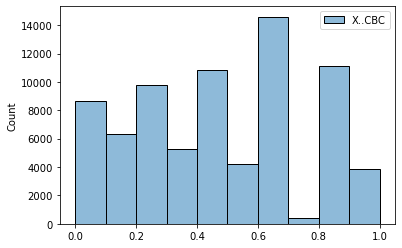

In [27]:
sns.histplot(y, bins = 10)

PCA

In [28]:
pca = PCA()
pca_comps = pca.fit_transform(X)

In [29]:
pca_comps

array([[ 1.64071426e+00, -5.97469827e-01, -2.84703235e-01, ...,
         5.02136118e-04, -2.36709302e-04, -5.27355824e-08],
       [-7.59626500e-01, -1.65089669e-01,  4.61314969e-01, ...,
         1.53521205e-04,  1.15807022e-03, -5.25877325e-08],
       [ 2.15508450e+00, -6.19740558e-01,  4.20189676e-02, ...,
         6.17297914e-03, -3.03274596e-03,  3.84189694e-09],
       ...,
       [-3.11230485e-01, -3.63240226e-01, -9.66063669e-02, ...,
         1.55255842e-03,  1.87328337e-03, -3.49351680e-08],
       [ 5.96727235e+00,  7.47720695e-01,  6.86955922e-01, ...,
         1.02510550e-02, -1.15085733e-02, -1.13539439e-08],
       [ 5.96727235e+00,  7.47720695e-01,  6.86955922e-01, ...,
         1.02510550e-02, -1.15085733e-02, -1.13539439e-08]])

In [30]:
type(pca_comps)

numpy.ndarray

In [31]:
explained_variance = pca.explained_variance_ratio_

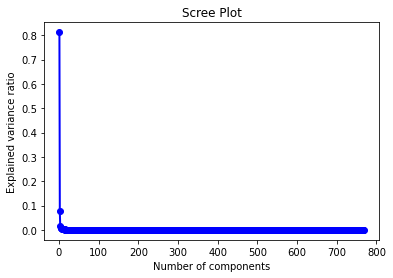

In [32]:
plt.plot(range(1, len(explained_variance)+1), explained_variance, 'bo-', linewidth=2)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('Scree Plot')
plt.show()

In [33]:
# Calculate the second derivative of the explained variance ratio curve
second_der = np.diff(explained_variance, 2)

# Find the index of the maximum value of the second derivative
elbow_index = np.argmax(second_der) + 1

# The optimal number of components is the index of the elbow point
n_components_optimal = elbow_index

In [34]:
n_components_optimal

1

In [35]:
X_reduced = pca.transform(X)[:, :n_components_optimal]

In [36]:
X_reduced

array([[ 1.64071426],
       [-0.7596265 ],
       [ 2.1550845 ],
       ...,
       [-0.31123048],
       [ 5.96727235],
       [ 5.96727235]])

train test split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, random_state=1, test_size=0.2)

In [38]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

MLP (before feature selection and hyperparameter tuning)

In [39]:
mlpreg = MLPRegressor(random_state=1, early_stopping=True)
mlpreg.fit(X_train1, y_train1)
y_pred_mlp = mlpreg.predict(X_val)
y_pred_mlp_r2 = mlpreg.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
mean_absolute_error(y_val, y_pred_mlp)

0.23600140391503047

In [41]:
mean_squared_error(y_val, y_pred_mlp)

0.07593530900162994

In [42]:
mean_squared_error(y_val, y_pred_mlp, squared = False)

0.27556362060625844

In [43]:
#train
r2_score(y_train1, y_pred_mlp_r2)

0.0024061982249119485

In [44]:
#val
r2_score(y_val, y_pred_mlp)

0.0009317585397322636

Hyperparameter tuning (MLP)

In [45]:
parameters = {'hidden_layer_sizes': [(100,), (50, 50, 50), (50, 100, 50)],
              'activation': ['tanh', 'relu'], #only tanh and relu
              'max_iter': [200, 500, 1000]
              }

In [46]:
rscv = RandomizedSearchCV(mlpreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs=-1)

In [47]:
rscv.fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_netwo

RandomizedSearchCV(cv=5,
                   estimator=MLPRegressor(early_stopping=True, random_state=1),
                   n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'hidden_layer_sizes': [(100,),
                                                               (50, 50, 50),
                                                               (50, 100, 50)],
                                        'max_iter': [200, 500, 1000]},
                   scoring='neg_mean_absolute_error')

In [48]:
rscv.best_params_

{'max_iter': 200, 'hidden_layer_sizes': (100,), 'activation': 'relu'}

In [49]:
joblib.dump(rscv, "rscv_mlp_bert_cbc.pkl")
joblib.dump(rscv.best_params_, "rscv_mlp_bert_best_params_cbc.pkl")

['rscv_mlp_bert_best_params_cbc.pkl']

kNN (after hyperparameter tuning)

In [50]:
mlpreg_ht = MLPRegressor(random_state=1, max_iter=200, activation = 'relu', hidden_layer_sizes= (100,), early_stopping=True)
mlpreg_ht.fit(X_train1, y_train1)
y_pred_mlp_ht = mlpreg_ht.predict(X_val)
y_pred_mlp_r2_ht = mlpreg_ht.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
mean_absolute_error(y_val, y_pred_mlp_ht)

0.23600140391503047

In [52]:
mean_squared_error(y_val, y_pred_mlp_ht)

0.07593530900162994

In [53]:
mean_squared_error(y_val, y_pred_mlp_ht, squared = False)

0.27556362060625844

In [54]:
#train
r2_score(y_train1, y_pred_mlp_r2_ht)

0.0024061982249119485

In [55]:
#val
r2_score(y_val, y_pred_mlp_ht)

0.0009317585397322636

Predicting on the test set (MLP)

In [56]:
y_pred_mlp_test = mlpreg_ht.predict(X_test)

In [57]:
joblib.dump(y_pred_mlp_test, "y_pred_mlp_test_bert_cbc.pkl")
joblib.dump(y_test, "y_test_mlp_bert_cbc.pkl")

['y_test_mlp_bert_cbc.pkl']

In [58]:
mean_absolute_error(y_test, y_pred_mlp_test)

0.23583844060344933

In [59]:
mean_squared_error(y_test, y_pred_mlp_test)

0.07605428579750713

In [60]:
mean_squared_error(y_test, y_pred_mlp_test, squared = False)

0.27577941510835635

In [61]:
r2_score(y_test, y_pred_mlp_test)

0.0006247010994211433

Error analysis (kNN)

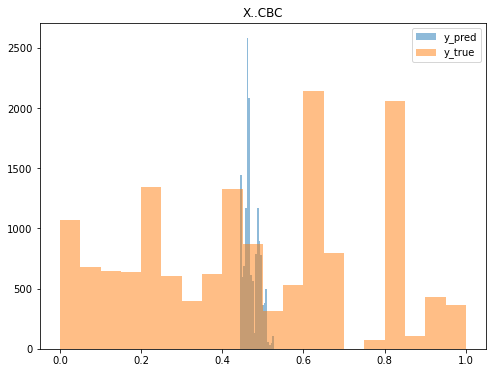

<Figure size 432x288 with 0 Axes>

In [62]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..CBC"  # specify the target variable name
ax.hist(y_pred_mlp_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_mlp_bert_cbc.png')

Pearson R

In [63]:
corr_coef, p_value = pearsonr(y_pred_mlp_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.041
P-value: 0.000


<AxesSubplot:>

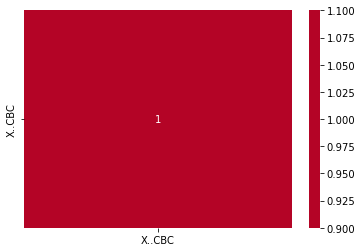

In [64]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)